In [ ]:
from google.colab import files
uploaded = files.upload()

Saving LBA_data.csv to LBA_data.csv


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
import io
df = pd.read_csv(io.BytesIO(uploaded['LBA_data.csv']))

In [ ]:
 df = df.iloc[:,3:]

In [ ]:
df.head()

,Country where you (and the grocery store) are,"Currency (e.g. EUR, GBP, USD)",Grocery store name and street address (or URL if shopping online),Price perception of the store brand,Average rental price near the grocery store,Product 1 quantity (kg),Product 1 price,Product 2 quantity (kg),Product 2 price,Product 3 quantity (kg),Product 3 price,Product 1 quantity (kg).1,Product 1 price.1,Product 2 quantity (kg).1,Product 2 price.1,Product 3 quantity (kg).1,Product 3 price.1,Product 1 quantity (kg).2,Product 1 price.2,Product 2 quantity (kg).2,Product 2 price.2,Product 3 quantity (kg).2,Product 3 price.2,Product 1 quantity (kg).3,Product 1 price.3,Product 2 quantity (kg).3,Product 2 price.3,Product 3 quantity (kg).3,Product 3 price.3,Product 1 quantity (kg).4,Product 1 price.4,Product 2 quantity (kg).4,Product 2 price.4,Product 3 quantity (kg).4,Product 3 price.4,Product 1 quantity (kg).5,Product 1 price.5,Product 2 quantity (kg).5,Product 2 price.5,Product 3 quantity (kg).5,Product 3 price.5,Product 1 quantity (liters),Product 1 price.6,Product 2 quantity (liters),Product 2 price.6,Product 3 quantity (liters),Product 3 price.6,Product 1 quantity (kg).6,Product 1 price.7,Product 2 quantity (kg).6,Product 2 price.7,Product 3 quantity (kg).6,Product 3 price.7,Product 1 quantity (count),Product 1 price.8,Product 2 quantity (count),Product 2 price.8,Product 3 quantity (count),Product 3 price.8,Product 1 quantity (kg).7,Product 1 price.9,Product 2 quantity (kg).7,Product 2 price.9,Product 3 quantity (kg).7,Product 3 price.9
0,Germany,EUR,"Lidl, Charlottenstraße 2, 10969 Berlin",Budget (cheap),826,2.0,2.22,1.0,2.99,1.0,1.49,1.0,3.90,1.0,1.59,1.0,0.89,1.0,2.39,0.5,2.19,0.50,2.99,1.5,1.89,1.0,1.79,2.5,1.29,1.0,0.39,1.0,0.89,1.0,1.39,0.50,1.49,1.0,1.99,0.5,1.490,1.0,0.72,1.0,0.80,1.0,0.99,0.25,1.79,0.100,0.85,0.25,2.29,6.0,1.490,6.0,1.99,10.0,1.990,0.6,4.49,1.0,6.79,0.40,3.49
1,Germany,EUR,"Lidl, Leipziger Str. 42, 10117 Berlin",Budget (cheap),1090,1.0,1.99,2.0,3.29,0.7,2.69,1.0,0.89,1.0,1.39,1.0,1.59,0.5,2.39,0.1,0.85,0.25,1.79,2.5,1.39,2.5,1.29,1.0,1.39,1.0,0.39,1.0,0.89,1.0,0.89,0.25,1.69,1.0,1.99,1.0,1.490,1.0,1.15,1.0,1.09,1.0,0.80,0.25,1.49,0.225,1.29,0.25,1.95,18.0,2.290,10.0,2.99,10.0,1.990,0.4,2.79,0.4,3.49,0.35,7.00
2,Germany,EUR,"EDEKA, Kottbusser Damm 5",Mid-range,924,1.0,2.99,1.0,2.49,1.0,4.99,1.0,0.88,1.0,1.99,NaN,NaN,1.0,4.98,1.0,3.99,1.00,16.60,1.0,1.99,1.0,1.99,1.0,1.99,1.0,1.59,1.0,0.39,1.0,0.89,0.50,2.89,0.5,2.89,0.5,0.995,1.0,1.29,1.0,1.09,1.0,0.71,0.25,1.69,0.250,3.29,0.25,2.29,10.0,4.290,10.0,1.59,6.0,1.990,1.0,29.90,1.0,24.99,1.00,14.90
3,Germany,EUR,"EDEKA, Pannierstr. 37 - 38",Mid-range,941,1.0,2.99,1.0,2.99,1.0,2.99,1.0,0.88,1.0,1.99,NaN,NaN,1.0,3.73,1.0,2.99,1.00,3.52,1.0,2.19,1.0,2.19,1.0,2.19,1.0,0.39,1.0,1.79,1.0,0.99,0.50,1.99,0.5,2.99,0.5,0.990,1.0,0.80,1.0,1.19,1.0,1.29,0.25,2.29,0.250,2.29,0.25,2.19,6.0,2.990,6.0,2.49,10.0,2.790,1.0,7.48,NaN,NaN,NaN,NaN
4,Seoul,Korean Won,"롯데마트(lotte mart), 서울특별시 중구 회현동 한강대로 405",Mid-range,74.31USD(87500KW) per meter square. (evidence:...,0.1,0.40,0.1,0.76,0.1,0.37,0.1,0.19,0.1,3.39,0.1,0.85,0.1,1.19,0.1,0.95,0.10,0.73,0.1,0.25,0.1,0.36,NaN,NaN,0.1,0.27,0.1,0.10,0.1,0.36,NaN,NaN,NaN,NaN,NaN,NaN,0.1,0.23,0.1,0.48,0.1,0.30,0.10,1.77,0.100,4.63,0.10,1.32,1.0,0.192,1.0,0.36,1.0,0.282,0.1,0.62,0.1,1.25,0.10,1.38


In [ ]:
#Encoded country name
#Germnay: 1
#UK: 2
#US: 3
#Korea: 4
df.rename(columns={'Country where you (and the grocery store) are': 'country'}, inplace = True)
df['country'] = df['country'].apply(lambda x: 1 if "berlin" in x.lower() 
else 1 if 'germany' in x.lower() 
else 2 if 'kingdom' in x.lower() 
else 2 if 'london' in x.lower()
else 2 if 'kindom' in x.lower()
else 2 if 'uk' in x.lower()
else 3 if 'united states' in x.lower()
else 4 if 'seoul' in x.lower()
else x)
# df['country'] = df['Country where you (and the grocery store) are'].apply(lambda x: 'UK' if "kingdom" in x.lower() else x)

In [ ]:
print(df.country.unique())
del df['Grocery store name and street address (or URL if shopping online)']

[1 4 2 3]


In [ ]:
#Encoded store 
#Budget (cheap): 1
#Mid-range: 2
#Luxury (expensive): 3
df.rename(columns={'Price perception of the store brand': 'brand'}, inplace = True)
df['brand'] = df['brand'].apply(lambda x: 1 if "Budget (cheap)" == x
else 2 if 'Mid-range' == x
else 3 if 'Luxury (expensive)' == x
else x) 


print(df.brand.unique())

[1 2 3]


In [ ]:
#calculate the price per kg
for col in range(4, len(df.columns)-1, 2):
  df.iloc[:, col+1] = df.iloc[:, col+1] / df.iloc[:, col]
df.head()

,country,"Currency (e.g. EUR, GBP, USD)",brand,Average rental price near the grocery store,Product 1 quantity (kg),Product 1 price,Product 2 quantity (kg),Product 2 price,Product 3 quantity (kg),Product 3 price,Product 1 quantity (kg).1,Product 1 price.1,Product 2 quantity (kg).1,Product 2 price.1,Product 3 quantity (kg).1,Product 3 price.1,Product 1 quantity (kg).2,Product 1 price.2,Product 2 quantity (kg).2,Product 2 price.2,Product 3 quantity (kg).2,Product 3 price.2,Product 1 quantity (kg).3,Product 1 price.3,Product 2 quantity (kg).3,Product 2 price.3,Product 3 quantity (kg).3,Product 3 price.3,Product 1 quantity (kg).4,Product 1 price.4,Product 2 quantity (kg).4,Product 2 price.4,Product 3 quantity (kg).4,Product 3 price.4,Product 1 quantity (kg).5,Product 1 price.5,Product 2 quantity (kg).5,Product 2 price.5,Product 3 quantity (kg).5,Product 3 price.5,Product 1 quantity (liters),Product 1 price.6,Product 2 quantity (liters),Product 2 price.6,Product 3 quantity (liters),Product 3 price.6,Product 1 quantity (kg).6,Product 1 price.7,Product 2 quantity (kg).6,Product 2 price.7,Product 3 quantity (kg).6,Product 3 price.7,Product 1 quantity (count),Product 1 price.8,Product 2 quantity (count),Product 2 price.8,Product 3 quantity (count),Product 3 price.8,Product 1 quantity (kg).7,Product 1 price.9,Product 2 quantity (kg).7,Product 2 price.9,Product 3 quantity (kg).7,Product 3 price.9
0,1,EUR,1,826,2.0,1.11,1.0,2.990,1.0,1.490000,1.0,3.90,1.0,1.59,1.0,0.89,1.0,2.39,0.5,4.38,0.50,5.98,1.5,1.260,1.0,1.790,2.5,0.516,1.0,0.39,1.0,0.89,1.0,1.39,0.50,2.98,1.0,1.99,0.5,2.98,1.0,0.72,1.0,0.80,1.0,0.99,0.25,7.16,0.100,8.500000,0.25,9.16,6.0,0.248333,6.0,0.331667,10.0,0.199000,0.6,7.483333,1.0,6.790,0.40,8.725
1,1,EUR,1,1090,1.0,1.99,2.0,1.645,0.7,3.842857,1.0,0.89,1.0,1.39,1.0,1.59,0.5,4.78,0.1,8.50,0.25,7.16,2.5,0.556,2.5,0.516,1.0,1.390,1.0,0.39,1.0,0.89,1.0,0.89,0.25,6.76,1.0,1.99,1.0,1.49,1.0,1.15,1.0,1.09,1.0,0.80,0.25,5.96,0.225,5.733333,0.25,7.80,18.0,0.127222,10.0,0.299000,10.0,0.199000,0.4,6.975000,0.4,8.725,0.35,20.000
2,1,EUR,2,924,1.0,2.99,1.0,2.490,1.0,4.990000,1.0,0.88,1.0,1.99,NaN,NaN,1.0,4.98,1.0,3.99,1.00,16.60,1.0,1.990,1.0,1.990,1.0,1.990,1.0,1.59,1.0,0.39,1.0,0.89,0.50,5.78,0.5,5.78,0.5,1.99,1.0,1.29,1.0,1.09,1.0,0.71,0.25,6.76,0.250,13.160000,0.25,9.16,10.0,0.429000,10.0,0.159000,6.0,0.331667,1.0,29.900000,1.0,24.990,1.00,14.900
3,1,EUR,2,941,1.0,2.99,1.0,2.990,1.0,2.990000,1.0,0.88,1.0,1.99,NaN,NaN,1.0,3.73,1.0,2.99,1.00,3.52,1.0,2.190,1.0,2.190,1.0,2.190,1.0,0.39,1.0,1.79,1.0,0.99,0.50,3.98,0.5,5.98,0.5,1.98,1.0,0.80,1.0,1.19,1.0,1.29,0.25,9.16,0.250,9.160000,0.25,8.76,6.0,0.498333,6.0,0.415000,10.0,0.279000,1.0,7.480000,NaN,NaN,NaN,NaN
4,4,Korean Won,2,74.31USD(87500KW) per meter square. (evidence:...,0.1,4.00,0.1,7.600,0.1,3.700000,0.1,1.90,0.1,33.90,0.1,8.50,0.1,11.90,0.1,9.50,0.10,7.30,0.1,2.500,0.1,3.600,NaN,NaN,0.1,2.70,0.1,1.00,0.1,3.60,NaN,NaN,NaN,NaN,NaN,NaN,0.1,2.30,0.1,4.80,0.1,3.00,0.10,17.70,0.100,46.300000,0.10,13.20,1.0,0.192000,1.0,0.360000,1.0,0.282000,0.1,6.200000,0.1,12.500,0.10,13.800


In [ ]:
# convert all currency to USD

#1EUR = 1.16USD
#1POUND = 1.35USD
#1WON = 0.00084USD
# df['currency_rate'] = 1
df.loc[df['Currency (e.g. EUR, GBP, USD)'] == 'EUR', 'currency_rate'] = 1.16
df.loc[df['Currency (e.g. EUR, GBP, USD)'] == 'GBP', 'currency_rate'] = 1.35
df.loc[df['Currency (e.g. EUR, GBP, USD)'] == 'Korean Won', 'currency_rate'] = 0.00084
df.loc[df['Currency (e.g. EUR, GBP, USD)'] == 'USD', 'currency_rate'] = 1
df.head()

,country,"Currency (e.g. EUR, GBP, USD)",brand,Average rental price near the grocery store,Product 1 quantity (kg),Product 1 price,Product 2 quantity (kg),Product 2 price,Product 3 quantity (kg),Product 3 price,Product 1 quantity (kg).1,Product 1 price.1,Product 2 quantity (kg).1,Product 2 price.1,Product 3 quantity (kg).1,Product 3 price.1,Product 1 quantity (kg).2,Product 1 price.2,Product 2 quantity (kg).2,Product 2 price.2,Product 3 quantity (kg).2,Product 3 price.2,Product 1 quantity (kg).3,Product 1 price.3,Product 2 quantity (kg).3,Product 2 price.3,Product 3 quantity (kg).3,Product 3 price.3,Product 1 quantity (kg).4,Product 1 price.4,Product 2 quantity (kg).4,Product 2 price.4,Product 3 quantity (kg).4,Product 3 price.4,Product 1 quantity (kg).5,Product 1 price.5,Product 2 quantity (kg).5,Product 2 price.5,Product 3 quantity (kg).5,Product 3 price.5,Product 1 quantity (liters),Product 1 price.6,Product 2 quantity (liters),Product 2 price.6,Product 3 quantity (liters),Product 3 price.6,Product 1 quantity (kg).6,Product 1 price.7,Product 2 quantity (kg).6,Product 2 price.7,Product 3 quantity (kg).6,Product 3 price.7,Product 1 quantity (count),Product 1 price.8,Product 2 quantity (count),Product 2 price.8,Product 3 quantity (count),Product 3 price.8,Product 1 quantity (kg).7,Product 1 price.9,Product 2 quantity (kg).7,Product 2 price.9,Product 3 quantity (kg).7,Product 3 price.9,currency_rate
0,1,EUR,1,826,2.0,1.11,1.0,2.990,1.0,1.490000,1.0,3.90,1.0,1.59,1.0,0.89,1.0,2.39,0.5,4.38,0.50,5.98,1.5,1.260,1.0,1.790,2.5,0.516,1.0,0.39,1.0,0.89,1.0,1.39,0.50,2.98,1.0,1.99,0.5,2.98,1.0,0.72,1.0,0.80,1.0,0.99,0.25,7.16,0.100,8.500000,0.25,9.16,6.0,0.248333,6.0,0.331667,10.0,0.199000,0.6,7.483333,1.0,6.790,0.40,8.725,1.16000
1,1,EUR,1,1090,1.0,1.99,2.0,1.645,0.7,3.842857,1.0,0.89,1.0,1.39,1.0,1.59,0.5,4.78,0.1,8.50,0.25,7.16,2.5,0.556,2.5,0.516,1.0,1.390,1.0,0.39,1.0,0.89,1.0,0.89,0.25,6.76,1.0,1.99,1.0,1.49,1.0,1.15,1.0,1.09,1.0,0.80,0.25,5.96,0.225,5.733333,0.25,7.80,18.0,0.127222,10.0,0.299000,10.0,0.199000,0.4,6.975000,0.4,8.725,0.35,20.000,1.16000
2,1,EUR,2,924,1.0,2.99,1.0,2.490,1.0,4.990000,1.0,0.88,1.0,1.99,NaN,NaN,1.0,4.98,1.0,3.99,1.00,16.60,1.0,1.990,1.0,1.990,1.0,1.990,1.0,1.59,1.0,0.39,1.0,0.89,0.50,5.78,0.5,5.78,0.5,1.99,1.0,1.29,1.0,1.09,1.0,0.71,0.25,6.76,0.250,13.160000,0.25,9.16,10.0,0.429000,10.0,0.159000,6.0,0.331667,1.0,29.900000,1.0,24.990,1.00,14.900,1.16000
3,1,EUR,2,941,1.0,2.99,1.0,2.990,1.0,2.990000,1.0,0.88,1.0,1.99,NaN,NaN,1.0,3.73,1.0,2.99,1.00,3.52,1.0,2.190,1.0,2.190,1.0,2.190,1.0,0.39,1.0,1.79,1.0,0.99,0.50,3.98,0.5,5.98,0.5,1.98,1.0,0.80,1.0,1.19,1.0,1.29,0.25,9.16,0.250,9.160000,0.25,8.76,6.0,0.498333,6.0,0.415000,10.0,0.279000,1.0,7.480000,NaN,NaN,NaN,NaN,1.16000
4,4,Korean Won,2,74.31USD(87500KW) per meter square. (evidence:...,0.1,4.00,0.1,7.600,0.1,3.700000,0.1,1.90,0.1,33.90,0.1,8.50,0.1,11.90,0.1,9.50,0.10,7.30,0.1,2.500,0.1,3.600,NaN,NaN,0.1,2.70,0.1,1.00,0.1,3.60,NaN,NaN,NaN,NaN,NaN,NaN,0.1,2.30,0.1,4.80,0.1,3.00,0.10,17.70,0.100,46.300000,0.10,13.20,1.0,0.192000,1.0,0.360000,1.0,0.282000,0.1,6.200000,0.1,12.500,0.10,13.800,0.00084


In [ ]:
#Transform rental price 
df.rename(columns={'Average rental price near the grocery store': 'average_rent'}, inplace = True)
df.average_rent[4]= 87500
df.average_rent[34] = 1050
df.average_rent[7] = 2150
df.average_rent[8] = 2150 
df.average_rent[44] = 1600
df.average_rent[45] = 1600

df.average_rent = pd.to_numeric(df.average_rent)
df.average_rent = df.average_rent * df.currency_rate
df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-

,country,"Currency (e.g. EUR, GBP, USD)",brand,average_rent,Product 1 quantity (kg),Product 1 price,Product 2 quantity (kg),Product 2 price,Product 3 quantity (kg),Product 3 price,Product 1 quantity (kg).1,Product 1 price.1,Product 2 quantity (kg).1,Product 2 price.1,Product 3 quantity (kg).1,Product 3 price.1,Product 1 quantity (kg).2,Product 1 price.2,Product 2 quantity (kg).2,Product 2 price.2,Product 3 quantity (kg).2,Product 3 price.2,Product 1 quantity (kg).3,Product 1 price.3,Product 2 quantity (kg).3,Product 2 price.3,Product 3 quantity (kg).3,Product 3 price.3,Product 1 quantity (kg).4,Product 1 price.4,Product 2 quantity (kg).4,Product 2 price.4,Product 3 quantity (kg).4,Product 3 price.4,Product 1 quantity (kg).5,Product 1 price.5,Product 2 quantity (kg).5,Product 2 price.5,Product 3 quantity (kg).5,Product 3 price.5,Product 1 quantity (liters),Product 1 price.6,Product 2 quantity (liters),Product 2 price.6,Product 3 quantity (liters),Product 3 price.6,Product 1 quantity (kg).6,Product 1 price.7,Product 2 quantity (kg).6,Product 2 price.7,Product 3 quantity (kg).6,Product 3 price.7,Product 1 quantity (count),Product 1 price.8,Product 2 quantity (count),Product 2 price.8,Product 3 quantity (count),Product 3 price.8,Product 1 quantity (kg).7,Product 1 price.9,Product 2 quantity (kg).7,Product 2 price.9,Product 3 quantity (kg).7,Product 3 price.9,currency_rate
0,1,EUR,1,958.16,2.000,1.110000,1.000,2.990000,1.000,1.490000,1.00,3.900000,1.00,1.590000,1.00,0.890000,1.000,2.390000,0.50,4.380000,0.50,5.980000,1.50,1.260000,1.00,1.790000,2.50,0.516000,1.00,0.390000,1.00,0.890000,1.00,1.390000,0.50,2.980000,1.00,1.990000,0.50,2.980000,1.000,0.720000,1.000,0.800000,1.000,0.990000,0.25,7.160000,0.100,8.500000,0.250,9.160000,6.0,0.248333,6.0,0.331667,10.0,0.199000,0.600,7.483333,1.000,6.790000,0.40,8.725000,1.16000
1,1,EUR,1,1264.40,1.000,1.990000,2.000,1.645000,0.700,3.842857,1.00,0.890000,1.00,1.390000,1.00,1.590000,0.500,4.780000,0.10,8.500000,0.25,7.160000,2.50,0.556000,2.50,0.516000,1.00,1.390000,1.00,0.390000,1.00,0.890000,1.00,0.890000,0.25,6.760000,1.00,1.990000,1.00,1.490000,1.000,1.150000,1.000,1.090000,1.000,0.800000,0.25,5.960000,0.225,5.733333,0.250,7.800000,18.0,0.127222,10.0,0.299000,10.0,0.199000,0.400,6.975000,0.400,8.725000,0.35,20.000000,1.16000
2,1,EUR,2,1071.84,1.000,2.990000,1.000,2.490000,1.000,4.990000,1.00,0.880000,1.00,1.990000,NaN,NaN,1.000,4.980000,1.00,3.990000,1.00,16.600000,1.00,1.990000,1.00,1.990000,1.00,1.990000,1.00,1.590000,1.00,0.390000,1.00,0.890000,0.50,5.780000,0.50,5.780000,0.50,1.990000,1.000,1.290000,1.000,1.090000,1.000,0.710000,0.25,6.760000,0.250,13.160000,0.250,9.160000,10.0,0.429000,10.0,0.159000,6.0,0.331667,1.000,29.900000,1.000,24.990000,1.00,14.900000,1.16000
3,1,EUR,2,1091.56,1.000,2.990000,1.000,2.990000,1.000,2.990000,1.00,0.880000,1.00,1.990000,NaN,NaN,1.000,3.730000,1.00,2.990000,1.00,3.520000,1.00,2.190000,1.00,2.190000,1.00,2.190000,1.00,0.390000,1.00,1.790000,1.00,0.990000,0.50,3.980000,0.50,5.980000,0.50,1.980000,1.000,0.800000,1.000,1.190000,1.000,1.290000,0.25,9.160000,0.250,9.160000,0.250,8.760000,6.0,0.498333,6.0,0.415000,10.0,0.279000,1.000,7.480000,NaN,NaN,NaN,NaN,1.16000
4,4,Korean Won,2,73.50,0.100,4.000000,0.100,7.600000,0.100,3.700000,0.10,1.900000,0.10,33.900000,0.10,8.500000,0.100,11.900000,0.10,9.500000,0.10,7.300000,0.10,2.500000,0.10,3.600000,NaN,NaN,0.10,2.700000,0.10,1.000000,0.10,3.600000,NaN,NaN,NaN,NaN,NaN,NaN,0.100,2.300000,0.100,4.800000,0.100,3.000000,0.10,17.700000,0.100,46.300000,0.100,13.200000,1.0,0.192000,1.0,0.360000,1.0,0.282000,0.100,6.200000,0.100,12.500000,0.10,13.800000,0.00084
5,2,GBP,3,2902.50,1.000,2.200000,0.100,5.000000,0.100,6.250000,1.00,0.830000,0.15,2.113333,0.10,1.790000,1.000,4.890000,1.00,8.330000,1.00,5.990000,1.00,0.600000,1.00,1.000000,1.00,1.300000,1.00,1.100000,1.00,1.500000,NaN,NaN,1.00,5.500000,1.00,1.600000,1.00,3.000000,1.000,0.950000,1.000,0.700000,1.000,1.350000,1.00,8.800000,1.000,7.000000,1.000,5.600000,1.0,0.5

In [ ]:
#Calculate average price per product 
for i in range(10):
    avg = pd.DataFrame(df.iloc[:, [5+6*i, 7+6*i, 9+6*i]]).mean(axis=1)
    df['product_'+str(i)] = avg * df['currency_rate']

In [ ]:
df
#filter the column we want 
df = df.iloc[:,[0,2,3, -10,-9,-8,-7,-6,-5,-4,-3,-2,-1]]
df.head()

,country,brand,average_rent,product_0,product_1,product_2,product_3,product_4,product_5,product_6,product_7,product_8,product_9
0,1,1,958.16,2.161467,2.466933,4.930000,1.378853,1.032400,3.074000,0.970533,9.597067,0.301213,8.892689
1,1,1,1264.40,2.891438,1.496400,7.903467,0.951973,0.839067,3.959467,1.175467,7.537422,0.241753,13.804000
2,1,2,1071.84,4.048400,1.664600,9.887067,2.308400,1.109733,5.239333,1.194800,11.244267,0.355604,26.985467
3,1,2,1091.56,3.468400,1.664600,3.959467,2.540400,1.225733,4.616800,1.268267,10.470933,0.461036,8.676800
4,4,2,73.50,0.004284,0.012404,0.008036,0.002562,0.002044,NaN,0.002828,0.021616,0.000234,0.009100


In [ ]:
#unpivot product id 
df_unpivot = df.melt(id_vars=['country', 'brand', 'average_rent'], var_name='product_id', value_name='price')

In [ ]:
df_unpivot
df_unpivot['product_id'] = df_unpivot['product_id'].apply(lambda x: 1 if "product_0" == x
else 2 if 'product_1' == x
else 3 if 'product_2' == x
else 4 if 'product_3' == x
else 5 if 'product_4' == x
else 6 if 'product_5' == x
else 7 if 'product_6' == x
else 8 if 'product_7' == x
else 9 if 'product_8' == x
else 10 if 'product_9' == x
else x) 

In [ ]:
#drop price equal to NA
df_unpivot.dropna(subset=['price'], inplace = True)
df_unpivot.dropna(subset=['brand'], inplace = True)
df_unpivot.dropna(subset=['product_id'], inplace = True)
df_unpivot.dropna(subset=['country'], inplace = True)

#drop outliers 
df_unpivot.drop([6], inplace = True)

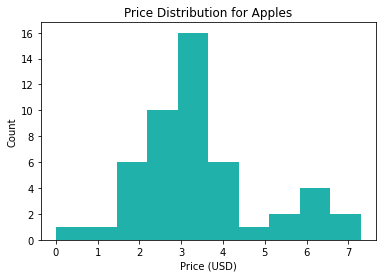

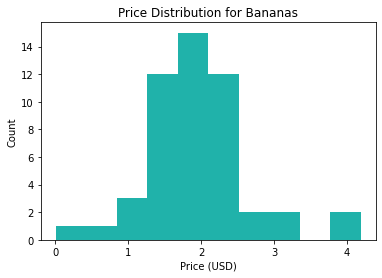

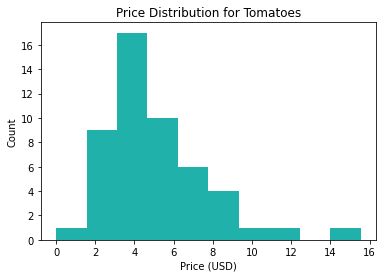

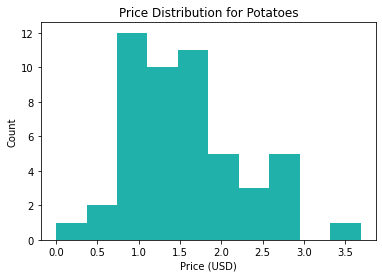

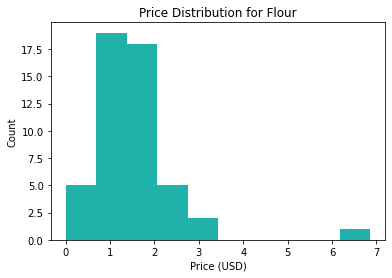

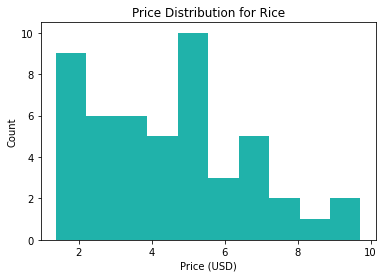

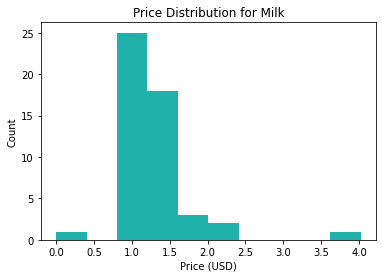

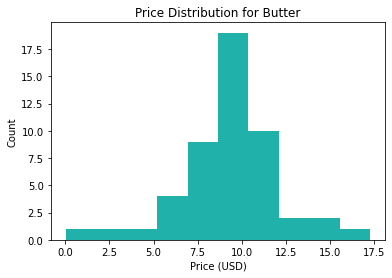

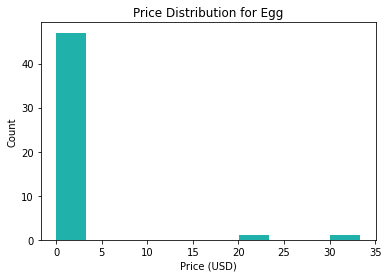

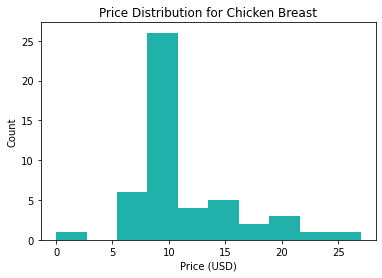

In [ ]:
product_name = ['Apples', 'Bananas', 'Tomatoes', 'Potatoes', 'Flour', 'Rice', 'Milk', 'Butter', 'Egg', 'Chicken Breast']
for id in range(1, 11):
  plt.hist(df_unpivot[df_unpivot['product_id']==id]['price'], color='lightseagreen')
  plt.title('Price Distribution for ' + str(product_name[id-1]))
  plt.xlabel("Price (USD)")
  plt.ylabel("Count")
  plt.show()

In [ ]:
import pystan
stan_code = '''
data {
    int<lower=1> n;  // # of total entries
    int country[n];  // encoded country 
    int product[n];  // encoded product
    int brand[n]; // encoded store type 
    real price[n]; // encoded store type 
    real<lower=0> alpha_0;  // fixed prior hyperparameter
    real<lower=0> beta_0;   // fixed prior hyperparameter
    real<lower=0> sigma1;   // fixed prior hyperparameter
    real<lower=0> sigma2;   // fixed prior hyperparameter
    real<lower=0> sigma3;   // fixed prior hyperparameter
}
parameters {
    vector<lower=0>[3] brand_multiplier;
    vector<lower=0>[4] country_multiplier;
    vector<lower=0>[10] base_price;
    real<lower=0> sigma_sqr;
}

model {
    // prior 
    base_price ~ lognormal(0, sigma1); 
    country_multiplier ~ lognormal(0, sigma2);
    brand_multiplier ~ lognormal(0, sigma3);

    // liklihood
    for (i in 1:n) {
        sigma_sqr ~ gamma(2, 0.5);
        price[i] ~ normal(base_price[product[i]] * country_multiplier[country[i]] * brand_multiplier[brand[i]], sqrt(sigma_sqr));
    }
}
'''
stan_model = pystan.StanModel(model_code = stan_code)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_0bc5873ca27b7505930657e50481f12c NOW.


In [ ]:
import numpy as np
#data for stan model 
prod = np.array(df_unpivot.product_id)
country = np.array(df_unpivot.country)
brand = np.array(df_unpivot.brand)
price = np.array(df_unpivot.price)
# price

stan_data = {
    'n': len(price),
    'price': price,
    'country': country,
    'brand': brand,
    'product': prod,
    'alpha_0': 5,  # alpha and beta govern the marginal prior over the variance.
    'beta_0': 10,
    'sigma1': 0.2,
    'sigma2': 0.2, 
    'sigma3': 0.2
}

results = stan_model.sampling(data=stan_data)

In [ ]:
results

Inference for Stan model: anon_model_0bc5873ca27b7505930657e50481f12c.
4 chains, each with iter=2000; warmup=1000; thin=1; 
post-warmup draws per chain=1000, total post-warmup draws=4000.

                        mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
brand_multiplier[1]     1.29  3.3e-3   0.12   1.07    1.2   1.28   1.37   1.55   1357    1.0
brand_multiplier[2]     1.74  4.5e-3   0.16   1.46   1.63   1.73   1.84   2.07   1210    1.0
brand_multiplier[3]     1.81  4.7e-3   0.17   1.49   1.68   1.79   1.92   2.18   1339    1.0
country_multiplier[1]   1.87  4.8e-3   0.17   1.57   1.76   1.86   1.97   2.23   1197    1.0
country_multiplier[2]   1.72  4.5e-3   0.16   1.44   1.61   1.71   1.82   2.05   1208    1.0
country_multiplier[3]   2.01  5.1e-3    0.2   1.65   1.87   2.01   2.14   2.44   1568    1.0
country_multiplier[4]   0.63  1.6e-3   0.09   0.47   0.56   0.62   0.69   0.82   3302    1.0
base_price[1]           1.18  2.3e-3   0.11   0.98    1.1   1.17   

# Questions
## 1. What is the basic average price for each product?

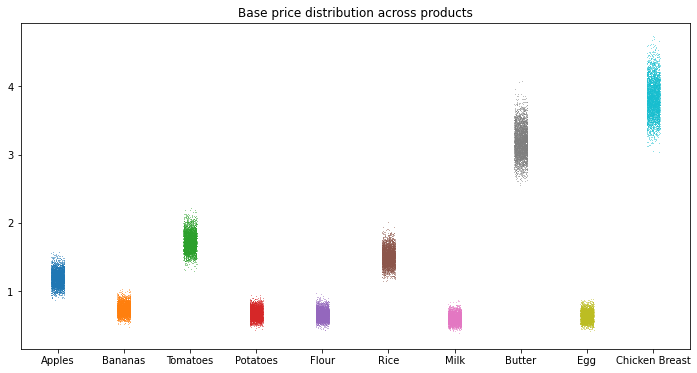

In [ ]:
samples = results.extract()

#Overall distribution plot for base price 
from scipy import stats
plt.figure(figsize=(12, 6))
for i in range(10):
    plt.plot(stats.uniform.rvs(loc=i+1-0.1, scale=0.2, size=samples['base_price'].shape[0]), samples['base_price'][:,i], ',', alpha=0.5)
plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], product_name)
plt.title("Base price distribution across products")
plt.show()

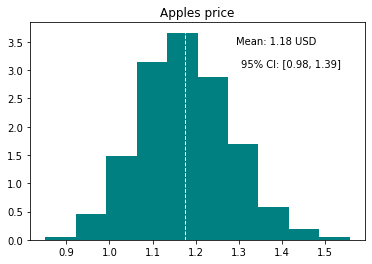

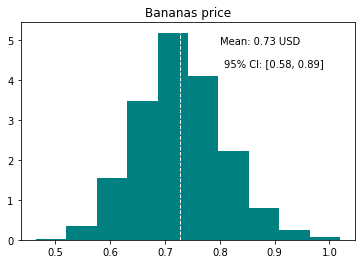

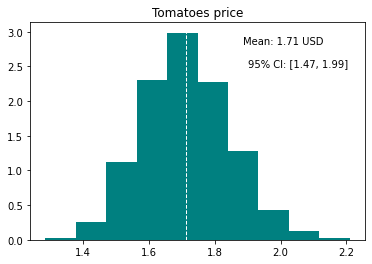

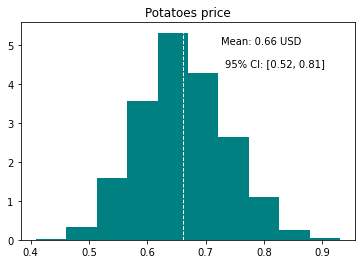

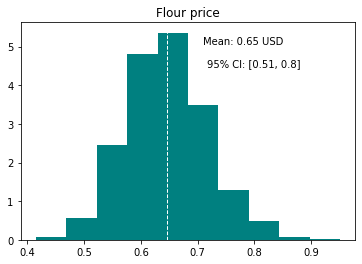

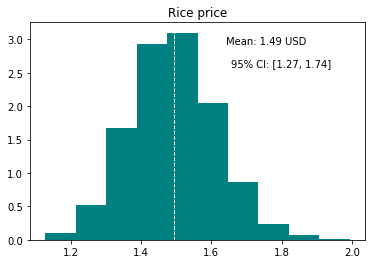

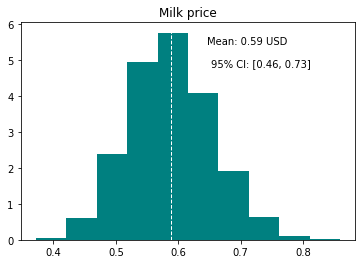

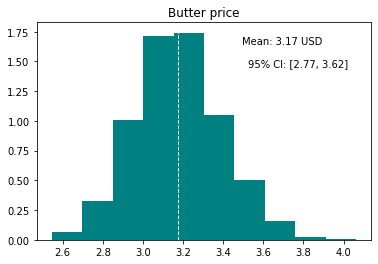

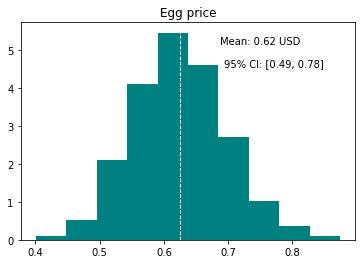

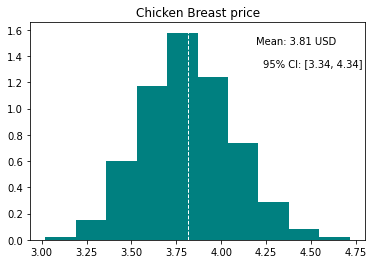

In [ ]:
#Base price for specific samples
for i in range(10):
    # get the product samples
    sample = results.extract()['base_price'][:, i]
    mean = sample.mean()
    
    # plot the samples
    plt.figure(figsize=(6,4))
    plt.hist(sample, density=True, color='teal')

    #plot product title
    plt.title(str(product_name[i])+' price')

    # add mean and ci 
    min_ylim, max_ylim = plt.ylim()
    plt.text(mean*1.1, max_ylim*0.9, 'Mean: {:.2f} USD'.format(mean), color='black')
    lower, upper = np.percentile(samples['base_price'][:,i], [2.5, 97.5])

    plt.text(mean*1.11, max_ylim*0.8, f'95% CI: [{round(lower,2)}, {round(upper, 2)}]', color='black')

    plt.axvline(mean, color='w', linestyle='dashed', linewidth=1)

## 2.1. How much does countries and brand modify the price of the product?


The country multiplier mean of Germany is 1.87(USD) and its confidence interval of is [1.57,2.23 ]
The country multiplier mean of UK is 1.72(USD) and its confidence interval of is [1.44,2.05 ]
The country multiplier mean of US is 2.01(USD) and its confidence interval of is [1.65,2.44 ]
The country multiplier mean of Korea is 0.63(USD) and its confidence interval of is [0.47,0.82 ]


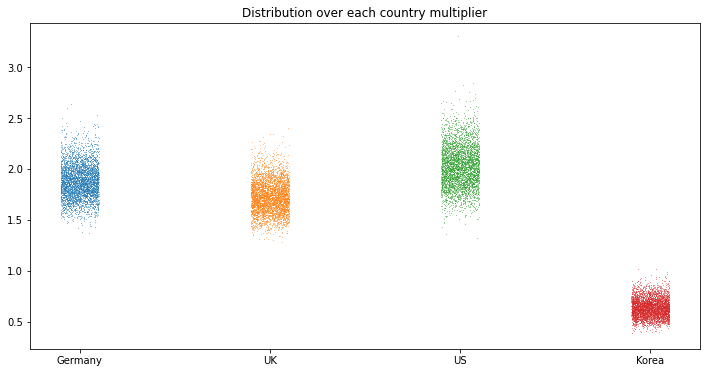

In [ ]:
plt.figure(figsize=(12, 6))
country_name = ['Germany', 'UK', 'US', 'Korea']
ci = []
for i in range(4):
    plt.plot(stats.uniform.rvs(loc=i+1-0.1, scale=0.2, size=samples['country_multiplier'].shape[0]), samples['country_multiplier'][:,i], ',', alpha=0.5)
    lower, upper = np.percentile(samples['country_multiplier'][:,i], [2.5, 97.5])
    mean = np.mean(samples['country_multiplier'][:,i])
    print('The country multiplier mean of '+ str(country_name[i])+ ' is ' + str(round(mean,2))+ '(USD) and its confidence interval of is [' +str(round(lower,2))+','+str(round(upper,2))+' ]')
    
plt.title('Country multiplier distribuion')
plt.xticks([1,2,3,4], country_name)
plt.show()

The brand multiplier mean of Budget is 1.29(USD) and its confidence interval of is [1.07,1.55 ]
The brand multiplier mean of Mid-Range is 1.74(USD) and its confidence interval of is [1.46,2.07 ]
The brand multiplier mean of Luxury is 1.81(USD) and its confidence interval of is [1.5,2.18 ]


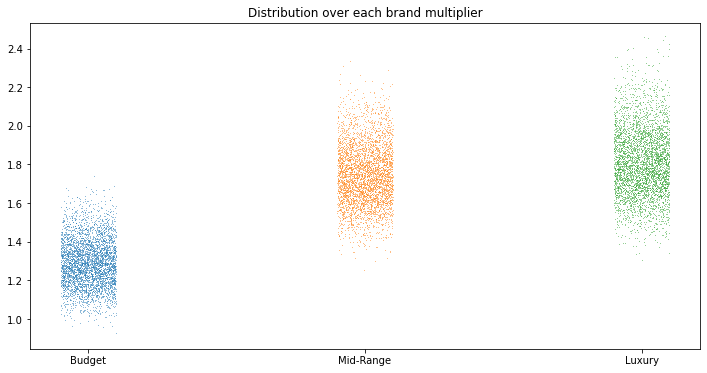

In [ ]:
plt.figure(figsize=(12, 6))
brand_level = ['Budget', 'Mid-Range', 'Luxury']
for i in range(3):
    plt.plot(stats.uniform.rvs(loc=i+1-0.1, scale=0.2, size=samples['brand_multiplier'].shape[0]), samples['brand_multiplier'][:,i], ',', alpha=0.5)
    lower, upper = np.percentile(samples['brand_multiplier'][:,i], [2.5, 97.5])
    mean = np.mean(samples['brand_multiplier'][:,i])
    print('The brand multiplier mean of '+ str(brand_level[i])+ ' is ' + str(round(mean,2))+ '(USD) and its confidence interval of is [' +str(round(lower,2))+','+str(round(upper,2))+' ]')
plt.xticks([1, 2, 3], brand_level)
plt.title('Distribution over each brand multiplier')
plt.show()

## 3. Does price variation by geographical location correlate with variation in rental prices? 

In [ ]:
corr = []
# country_name = ['Germany', 'UK', 'US', 'Korea']
print(df_unpivot.country.unique())
Germany = df_unpivot[df_unpivot['country']== 1]
UK = df_unpivot[df_unpivot['country']== 2]
US = df_unpivot[df_unpivot['country']== 3]
Korea = df_unpivot[df_unpivot['country']== 4]
Germany[['average_rent', 'price']].corr()

[1 4 2 3]


,average_rent,price
average_rent,1.000000,-0.090596
price,-0.090596,1.000000


In [ ]:
UK[['average_rent', 'price']].corr()

,average_rent,price
average_rent,1.00000,0.03777
price,0.03777,1.00000


In [ ]:
df_unpivot.corr()

,country,brand,average_rent,product_id,price
country,1.000000,0.378669,0.585978,0.004924,-0.004315
brand,0.378669,1.000000,0.285407,0.003478,0.126364
average_rent,0.585978,0.285407,1.000000,0.008899,0.070106
product_id,0.004924,0.003478,0.008899,1.000000,0.358368
price,-0.004315,0.126364,0.070106,0.358368,1.000000
